In [1]:
import os
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import get_file

from deepcell.utils.plot_utils import create_rgb_image
from deepcell.datasets import Dataset
from deepcell_spots.applications import SpotDetection

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [2]:
def load_data(self, path=None):
    path = path if path else self.path
    
    basepath = os.path.expanduser(os.path.join('~', '.keras', 'datasets'))
    prefix = path.split(os.path.sep)[:-1]
    data_dir = os.path.join(basepath, *prefix) if prefix else basepath
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    elif not os.path.isdir(data_dir):
        raise IOError('{} exists but is not a directory'.format(data_dir))

    path = get_file(path,
                    origin=self.url,
                    file_hash=self.file_hash)
    
#     data = np.load(path)
#     spots_image = data['spots_image']
#     spots_image = np.swapaxes(spots_image, 3, 0)

    data = imageio.volread(path)
    spots_image = np.expand_dims(data, axis=[0,-1])
    
    return spots_image

Dataset.load_data = load_data

In [3]:
datafile = Dataset(
    path='seqFISH_image.tiff',
    url='https://deepcell-data.s3.us-west-1.amazonaws.com/spot_detection/example_images/seqFISH_image.tif',
    file_hash='118cde0100bb0075afb4875fc7e70c8a',
    metadata={})
spots_image = datafile.load_data()
spots_image.shape

(1, 2048, 2048, 1)

In [4]:
app = SpotDetection()

2023-07-24 22:59:33.886700: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 22:59:34.571053: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9897 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:09:00.0, compute capability: 6.1


In [5]:
pred = app.predict(spots_image)

2023-07-24 22:59:41.215290: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


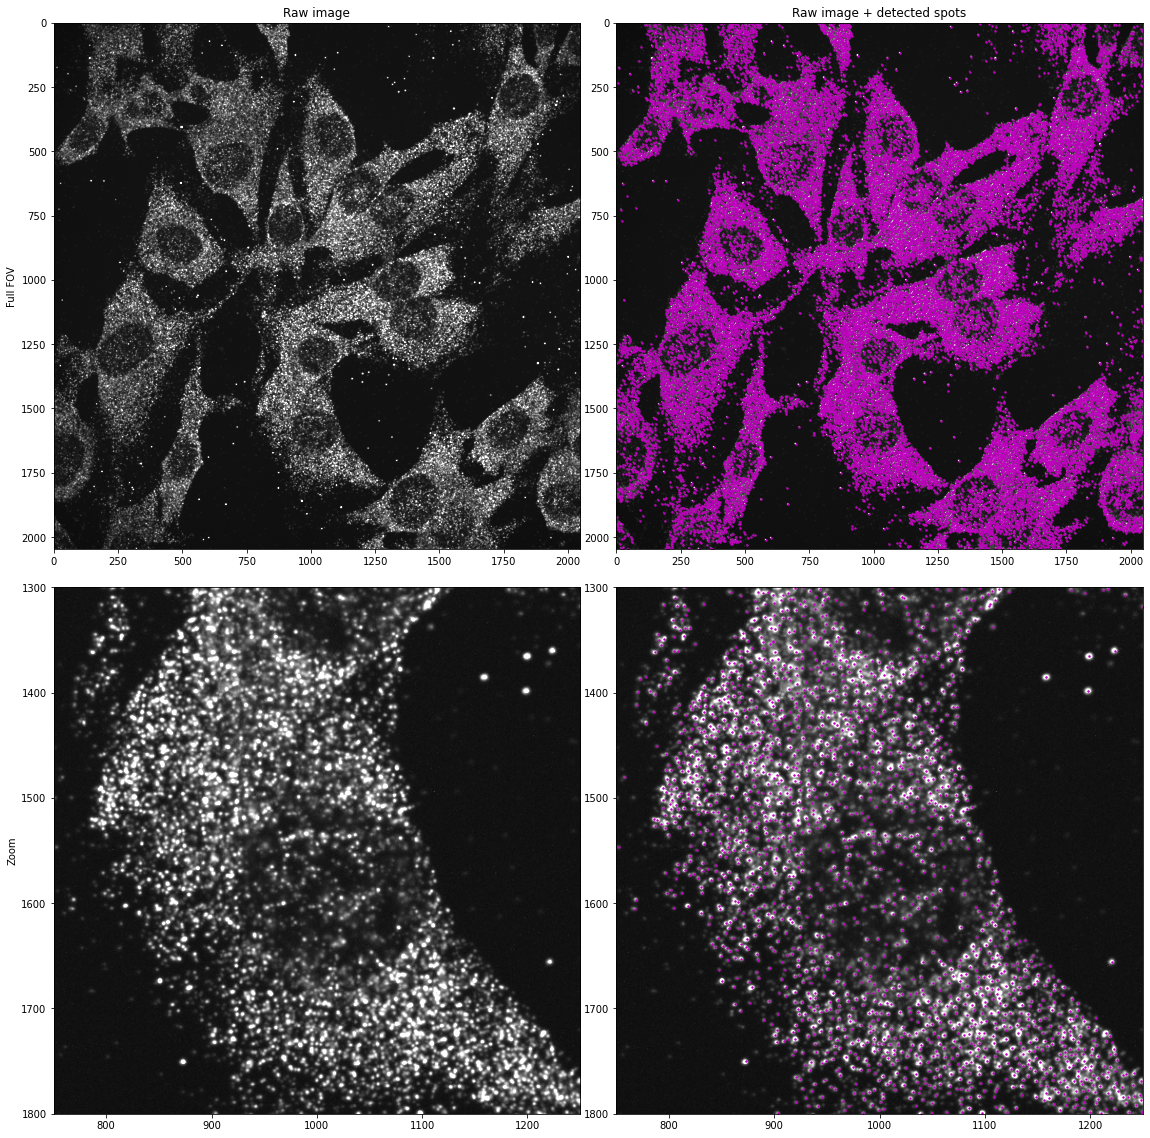

In [6]:
fig,ax = plt.subplots(2,2,figsize=(16,16))

for i in range(2):
    ax[i,0].imshow(spots_image[0,...,0], cmap='gray', vmax=3000)
    ax[i,1].imshow(spots_image[0,...,0], cmap='gray', vmax=3000)
    ax[i,1].scatter(pred[0][:,1], pred[0][:,0], c='m', s=2)

    # zoom
    ax[1,i].set_xlim([750,1250])
    ax[1,i].set_ylim([1800,1300])
    
ax[0,0].set_title('Raw image')
ax[0,1].set_title('Raw image + detected spots')
ax[0,0].set_ylabel('Full FOV')
ax[1,0].set_ylabel('Zoom')

plt.tight_layout()
plt.show()